In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [31]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import time
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [20]:
df.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(42000, 785)

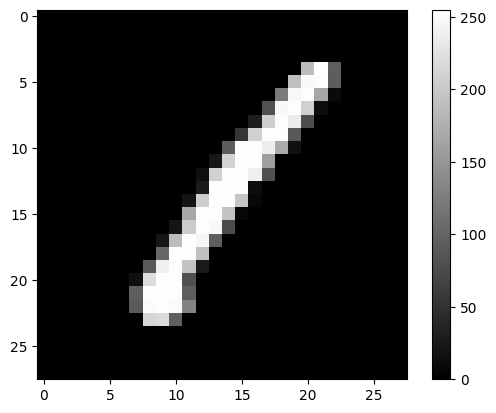

In [22]:
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

In [23]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
import time
start = time.time()
y_pred = knn.predict(X_test)
end = time.time()
print(end-start)

14.536568880081177


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9659047619047619


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [34]:
X_train_pca.shape

(31500, 100)

In [35]:
knn_PCA = KNeighborsClassifier()

knn_PCA.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [36]:
import time
start = time.time()
y_pred = knn_PCA.predict(X_test_pca)
end = time.time()
print(end-start)

2.2845876216888428


In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9541904761904761


In [38]:
for i in range(1, 100):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
    
  knn = KNeighborsClassifier()
    
  knn.fit(X_train_pca, y_train)
    
  y_pred = knn.predict(X_test_pca)
    
  accuracy = accuracy_score(y_test, y_pred)
    
  print("Accuracy:", accuracy)

Accuracy: 0.2611428571428571
Accuracy: 0.3372380952380952
Accuracy: 0.5052380952380953
Accuracy: 0.666
Accuracy: 0.7352380952380952
Accuracy: 0.825047619047619
Accuracy: 0.8424761904761905
Accuracy: 0.8717142857142857
Accuracy: 0.884
Accuracy: 0.9053333333333333
Accuracy: 0.9137142857142857
Accuracy: 0.918952380952381
Accuracy: 0.9245714285714286
Accuracy: 0.9322857142857143
Accuracy: 0.9361904761904762
Accuracy: 0.9385714285714286
Accuracy: 0.94
Accuracy: 0.9407619047619048
Accuracy: 0.9431428571428572
Accuracy: 0.9456190476190476
Accuracy: 0.9447619047619048
Accuracy: 0.9458095238095238
Accuracy: 0.9453333333333334
Accuracy: 0.9474285714285714


KeyboardInterrupt: 

In [39]:
# PCA for visualzatiion
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pcs = pca.transform(X_test_scaled)

In [40]:
X_train_pca.shape

(31500, 2)

In [41]:
import plotly.express as px
y_train_scaled = y_train.astype(str)
fig = px.scatter(x=X_train_pca[:,0],
                 y=X_train_pca[:,1],
                 color=y_train_scaled,
                 color_discrete_sequence= px.colors.qualitative.G10)
fig.show()

In [42]:
# transforming in 3d
 
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [43]:
X_train_pca.shape

(31500, 3)

In [44]:
import plotly.express as px
y_train_scaled = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_pca[:,0],
                    y=X_train_pca[:,1],
                    z=X_train_pca[:,2],
                    color=y_train_scaled)
fig.update_layout(margin= dict(l=20, r=20, b=20, t=20),
                  paper_bgcolor='rgba(0,0,0,0)')
fig.show()

In [45]:
pca.explained_variance_

array([40.49884342, 29.09813171, 26.92114713])

In [46]:
pca.explained_variance_ratio_

array([0.05768883, 0.04144901, 0.038348  ])

In [47]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [48]:
pca.explained_variance_.shape

(784,)

In [49]:
pca.components_.shape

(784, 784)

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05768883, 0.09913784, 0.13748584, 0.16722569, 0.19281374,
       0.21533803, 0.23511352, 0.25300021, 0.26883234, 0.28323676,
       0.29696623, 0.30930681, 0.32078279, 0.33203306, 0.34263806,
       0.3528388 , 0.36246969, 0.37190498, 0.38106454, 0.39007421,
       0.39854067, 0.40670139, 0.4144393 , 0.42202257, 0.42936134,
       0.43646073, 0.44343752, 0.45019326, 0.45657642, 0.4628377 ,
       0.4690421 , 0.47511089, 0.48097466, 0.4867357 , 0.49248296,
       0.49802   , 0.50350449, 0.50879922, 0.51391806, 0.51886019,
       0.52376734, 0.52855275, 0.53321905, 0.53783505, 0.54244347,
       0.54697391, 0.55145634, 0.55591354, 0.56029078, 0.56462085,
       0.56886143, 0.57296515, 0.57703169, 0.58106295, 0.58504879,
       0.58888377, 0.59266465, 0.59640255, 0.60009366, 0.60368987,
       0.60723621, 0.6107649 , 0.61426435, 0.61773376, 0.6211583 ,
       0.6245327 , 0.62787439, 0.63118414, 0.63444508, 0.63768186,
       0.64085978, 0.64398821, 0.64709036, 0.65014373, 0.65318

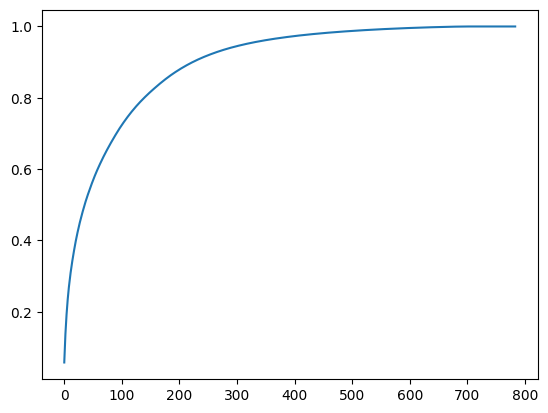

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))